In [757]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import geopandas as gpd

import seaborn as sns
import matplotlib.style as style; style.use('fivethirtyeight')

In [758]:
covid_df=pd.read_csv("full-corona1_raw.csv")
df=covid_df.copy()
df.set_index('Patient Number')
df_states=df.groupby(['Date Announced','Detected State']).count().unstack('Detected State').fillna(0)['Patient Number']
#df_states.head()

In [759]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5351 entries, 0 to 5350
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient Number                 5351 non-null   int64 
 1   State Patient Number           1141 non-null   object
 2   Date Announced                 5351 non-null   object
 3   Age                            1001 non-null   object
 4   Gender                         1440 non-null   object
 5   Detected City                  874 non-null    object
 6   Detected District              4378 non-null   object
 7   Detected State                 5351 non-null   object
 8   State code                     5338 non-null   object
 9   Current Status                 5350 non-null   object
 10  Notes                          4129 non-null   object
 11  Contracted from which Patient  1138 non-null   object
 12  Nationality                    472 non-null    object
 13  Typ

In [760]:
df['Date Announced']=df['Date Announced'].astype("datetime64")

In [761]:
df['Age']=df["Age"].replace('28-35', 31)

In [762]:
y=df.groupby(['Detected State']).count()['Patient Number'].sort_values()[:-6:-1]#states#daily count
z=df.groupby(['Detected State']).count()['Patient Number'].sort_values()[:10:-1]#states#cumsum
#df.groupby(['Detected State']).count()['Patient Number'].sort_values()

<Figure size 1800x1080 with 0 Axes>

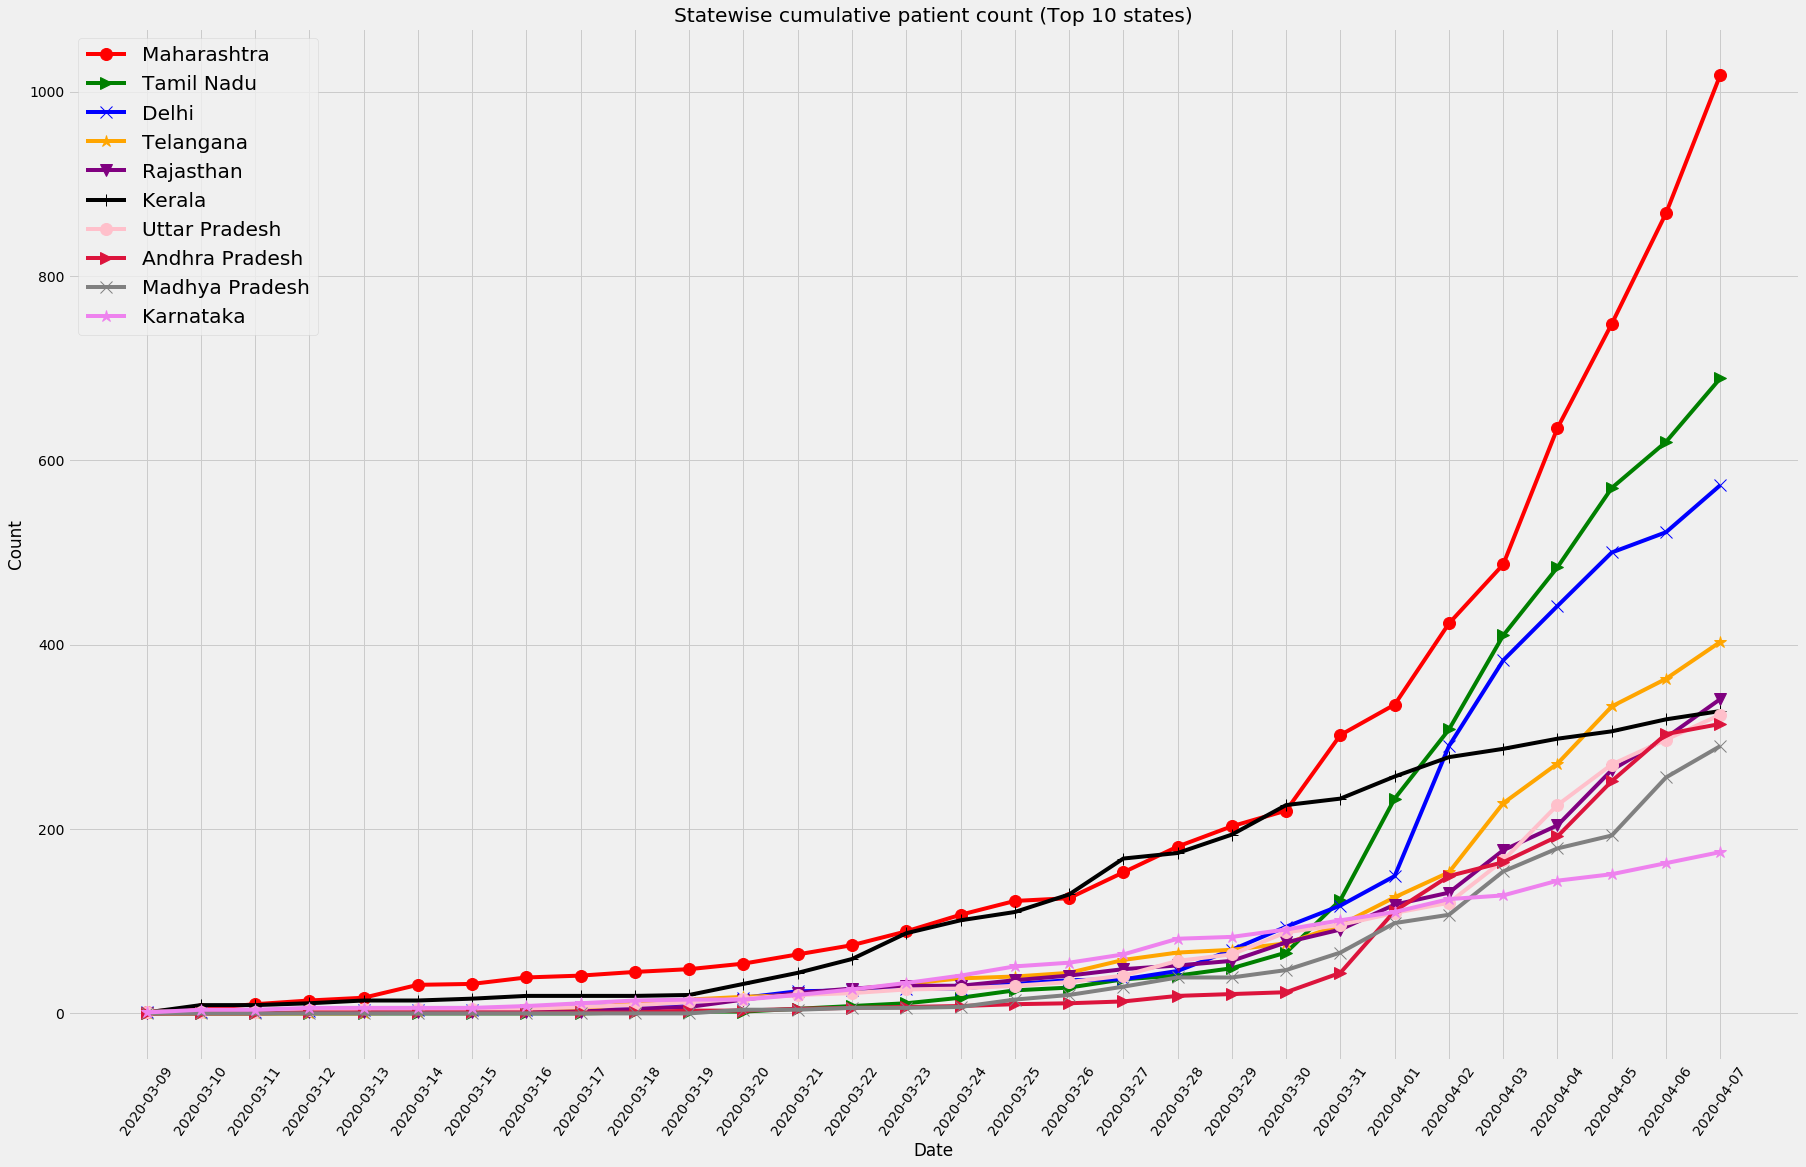

In [763]:
plt.figure(figsize= (25,15))
x=z.index
c=['red','green','blue','orange','purple','black','pink','crimson','grey','violet']
m=["o",">","x","*","v","+","o",">","x","*","v","+"]
k=1

plt.figure(figsize=(25,15))
#fig, ax = plt.subplots()
#date_time=df.iloc(0)
#a=plt.plot_date(date_df['Date Announced'],date_df['Patient Number'],fmt="r-")
for i,j,l in  zip(x,c,m):
    
    plt.tight_layout()
    a=plt.plot(df_states.index[10:],np.cumsum(df_states[i][10:]),marker=l,color=j,markersize=12,label=i)
    #sns.distplot(df_bankloan_new[i], color=j)
    k=k+1




plt.xticks(rotation=55)
plt.title("Statewise cumulative patient count (Top 10 states)")
plt.ylabel("Count")
plt.xlabel("Date")
plt.legend(fontsize ='x-large')
#ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m-%d'))
plt.show()


<Figure size 1800x1080 with 0 Axes>

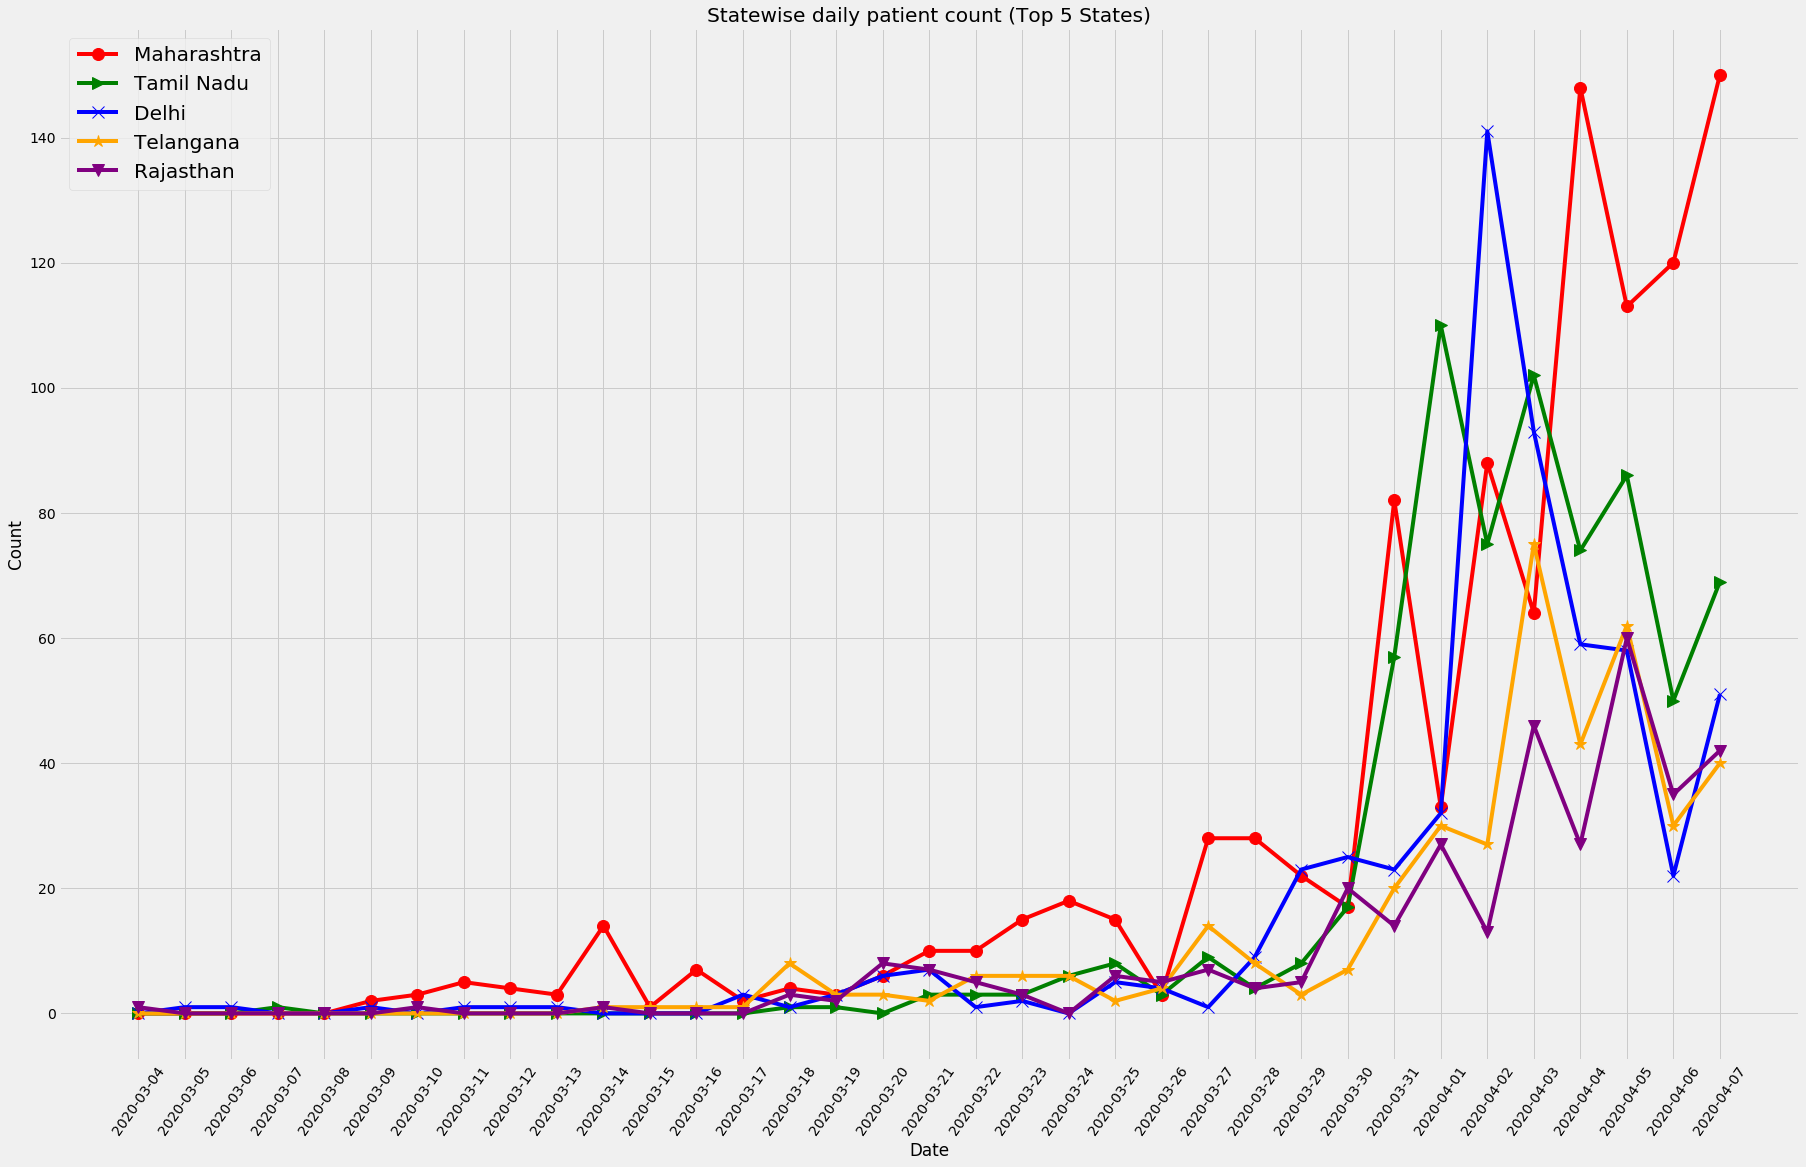

In [766]:
plt.figure(figsize= (25,15))
x=y.index
c=['red','green','blue','orange','purple','black','pink','crimson','grey','violet']
m=["o",">","x","*","v","+","o",">","x","*","v","+"]
k=1

plt.figure(figsize=(25,15))
#fig, ax = plt.subplots()
#date_time=df.iloc(0)
#a=plt.plot_date(date_df['Date Announced'],date_df['Patient Number'],fmt="r-")
for i,j,l in  zip(x,c,m):
    
    plt.tight_layout()
    a=plt.plot(df_states.index[5:],df_states[i][5:],marker=l,color=j,markersize=12,label=i)
    #sns.distplot(df_bankloan_new[i], color=j)
    k=k+1




plt.xticks(rotation=55)
plt.title("Statewise daily patient count (Top 5 States)")
plt.ylabel("Count")
plt.xlabel("Date")
plt.legend(fontsize ='x-large')
#ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m-%d'))
plt.show()

In [767]:
deno= list(df_states['Kerala'][21:])
num=deno[1:]
deno.pop(-1)
num=np.array(num)
deno=np.array(deno)

In [768]:
y=np.array(df_states.index)[22:]
y[1:]

array(['2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
       '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
       '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
       '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
       '2020-04-07'], dtype=object)

In [769]:
num

array([12., 15., 28., 14.,  9., 19., 39.,  6., 20., 32.,  7., 24., 21.,
        9., 11.,  8., 13.,  9.])

In [770]:
num/deno

array([1.        , 1.25      , 1.86666667, 0.5       , 0.64285714,
       2.11111111, 2.05263158, 0.15384615, 3.33333333, 1.6       ,
       0.21875   , 3.42857143, 0.875     , 0.42857143, 1.22222222,
       0.72727273, 1.625     , 0.69230769])

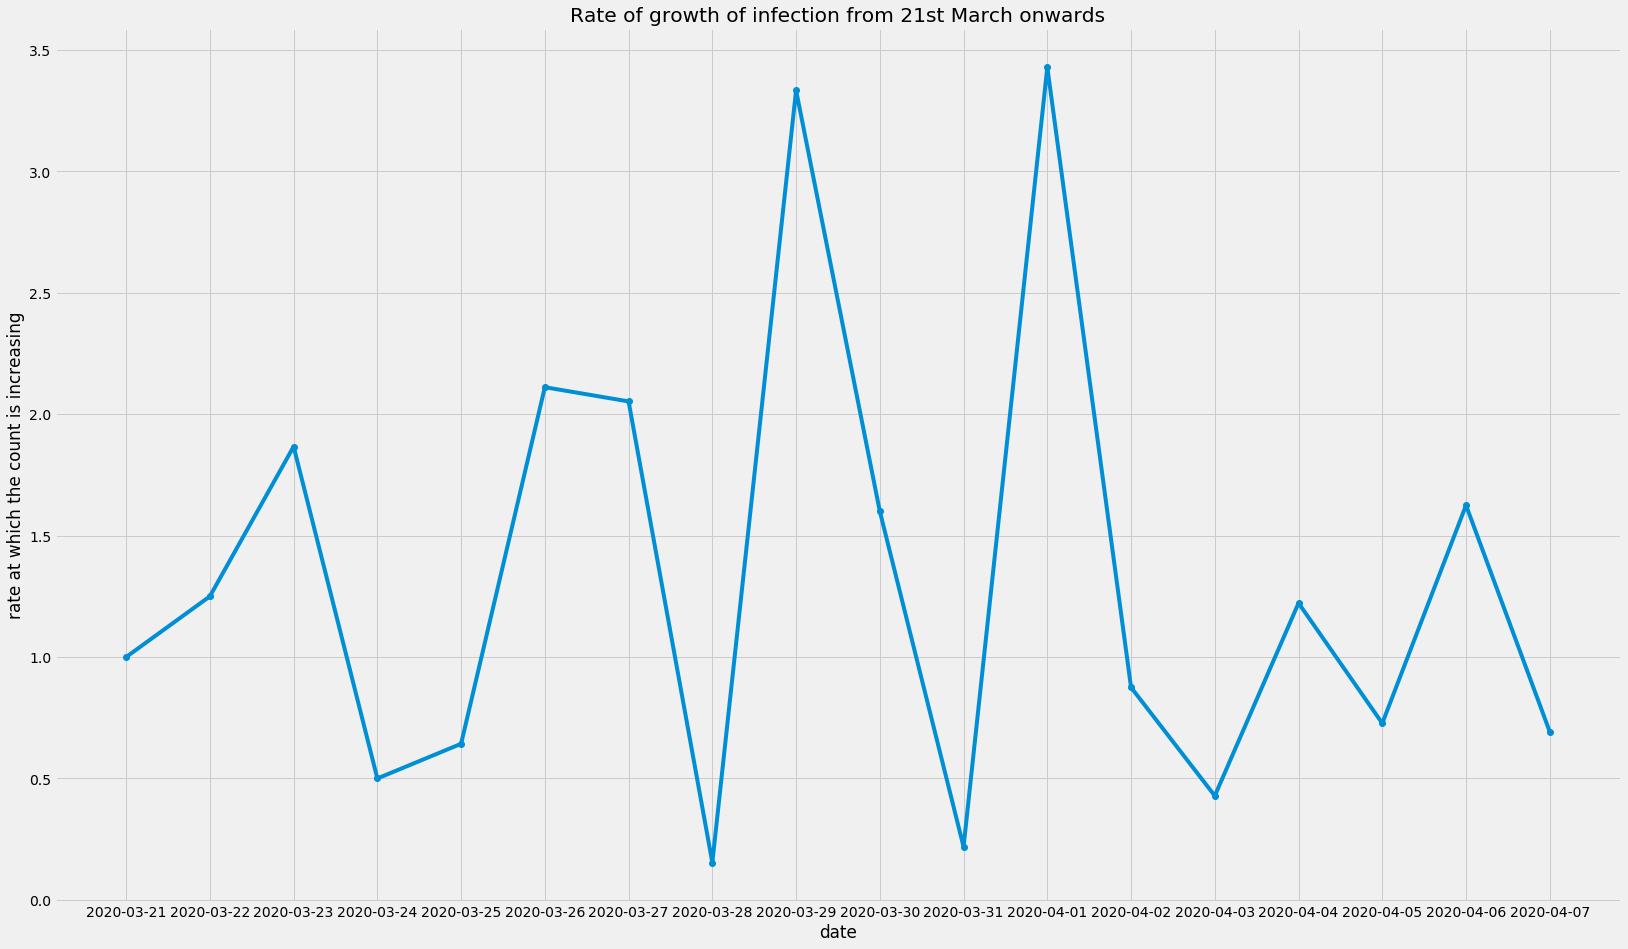

In [771]:
plt.figure(figsize=(25,15))
plt.ylabel("rate at which the count is increasing")
plt.xlabel("date")

plt.title("Rate of growth of infection from 21st March onwards")

plt.plot(y,(num/deno),marker='o')
plt.show()

In [772]:
y

array(['2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
       '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
       '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
       '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
       '2020-04-06', '2020-04-07'], dtype=object)

In [773]:
#covid_df.info()
#covid_df.isnull().sum()
covid_df.columns

Index(['Patient Number', 'State Patient Number', 'Date Announced', 'Age',
       'Gender', 'Detected City', 'Detected District', 'Detected State',
       'State code', 'Current Status', 'Notes',
       'Contracted from which Patient', 'Nationality', 'Type of transmission',
       'Status Change Date', 'Source_1', 'Source_2', 'Source_3',
       'Backup Notes'],
      dtype='object')

In [774]:
df_districts=df.groupby(['Date Announced','Detected District']).count().unstack('Detected District').fillna(0)['Patient Number']
#df_districts.head()

In [775]:
y=df.groupby(['Detected District']).count()['Patient Number'].sort_values()[:-6:-1]#states#daily count
z=df.groupby(['Detected District']).count()['Patient Number'].sort_values()[:10:-1]#states#cumsum
#df.groupby(['Detected State']).count()['Patient Number'].sort_values()

In [776]:
#df_districts.index[10:]

<Figure size 1800x1080 with 0 Axes>

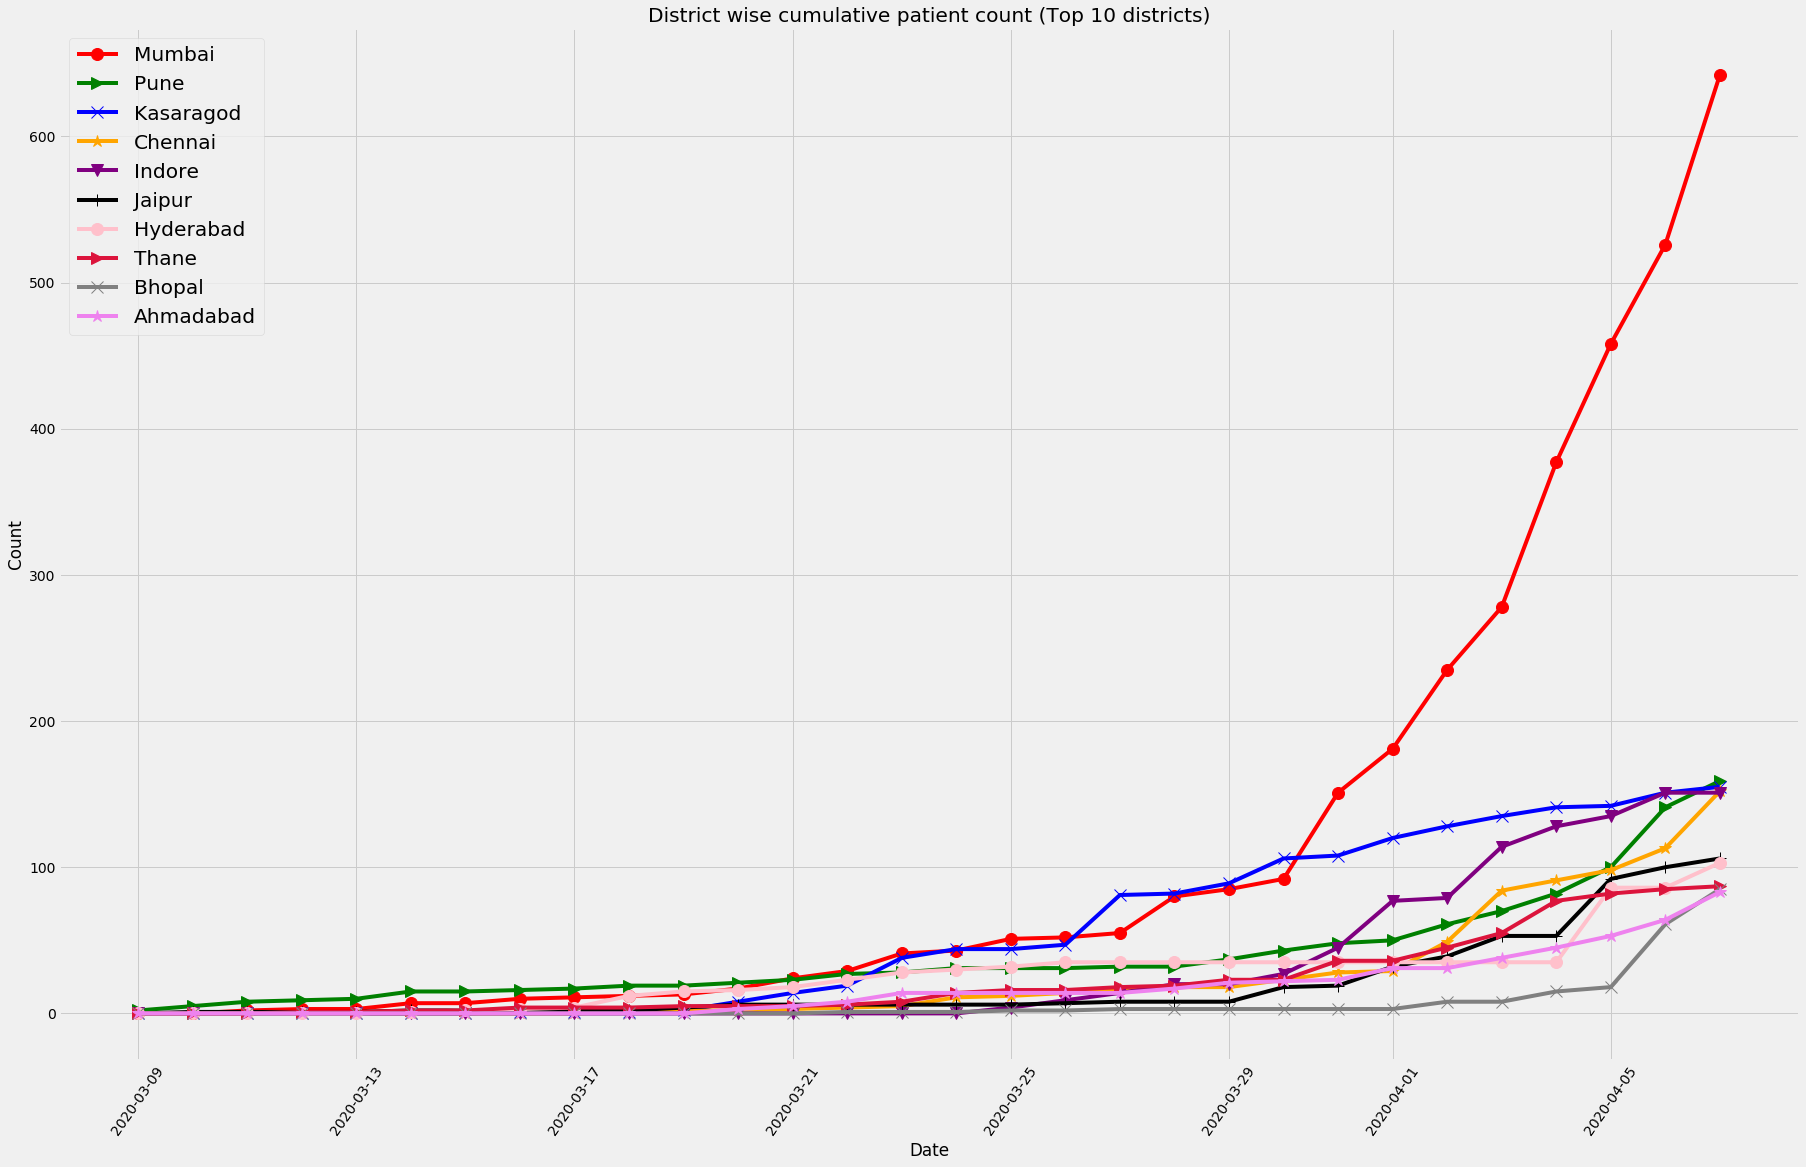

In [777]:
plt.figure(figsize= (25,15))
x=z.index
c=['red','green','blue','orange','purple','black','pink','crimson','grey','violet']
m=["o",">","x","*","v","+","o",">","x","*","v","+"]
k=1

plt.figure(figsize=(25,15))
#fig, ax = plt.subplots()
#date_time=df.iloc(0)
#a=plt.plot_date(date_df['Date Announced'],date_df['Patient Number'],fmt="r-")
for i,j,l in  zip(x,c,m):
    
    plt.tight_layout()
    a=plt.plot(df_districts.index[10:],np.cumsum(df_districts[i][10:]),marker=l,color=j,markersize=12,label=i)
    #sns.distplot(df_bankloan_new[i], color=j)
    k=k+1




plt.xticks(rotation=55)
plt.title("District wise cumulative patient count (Top 10 districts)")
plt.ylabel("Count")
plt.xlabel("Date")
plt.legend(fontsize ='x-large')
#ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m-%d'))
plt.show()

<Figure size 1800x1080 with 0 Axes>

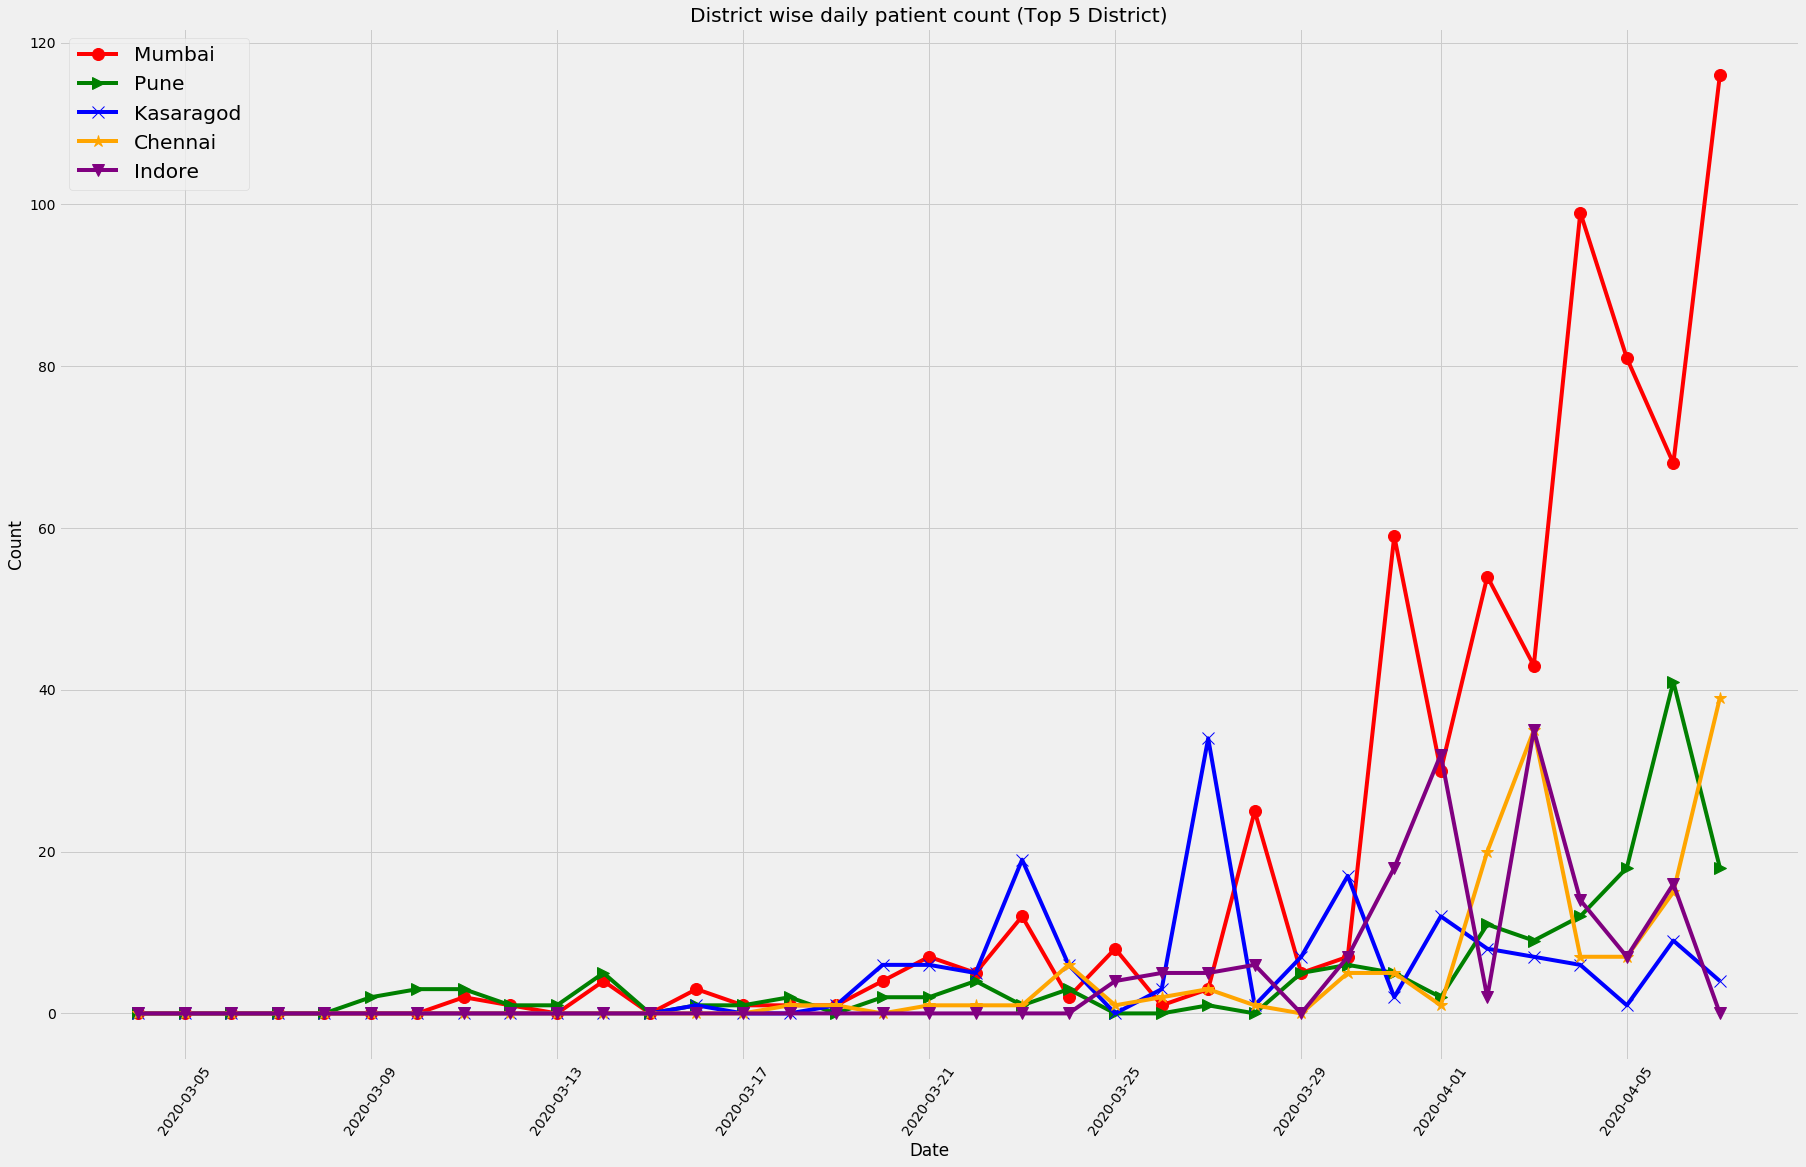

In [778]:
plt.figure(figsize= (25,15))
x=y.index
c=['red','green','blue','orange','purple','black','pink','crimson','grey','violet']
m=["o",">","x","*","v","+","o",">","x","*","v","+"]
k=1

plt.figure(figsize=(25,15))
#fig, ax = plt.subplots()
#date_time=df.iloc(0)
#a=plt.plot_date(date_df['Date Announced'],date_df['Patient Number'],fmt="r-")
for i,j,l in  zip(x,c,m):
    
    plt.tight_layout()
    a=plt.plot(df_districts.index[5:],df_districts[i][5:],marker=l,color=j,markersize=12,label=i)
    #sns.distplot(df_bankloan_new[i], color=j)
    k=k+1




plt.xticks(rotation=55)
plt.title("District wise daily patient count (Top 5 District)")
plt.ylabel("Count")
plt.xlabel("Date")
plt.legend(fontsize ='x-large')
#ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m-%d'))
plt.show()

Text(0.5, 1.0, 'Affected people')

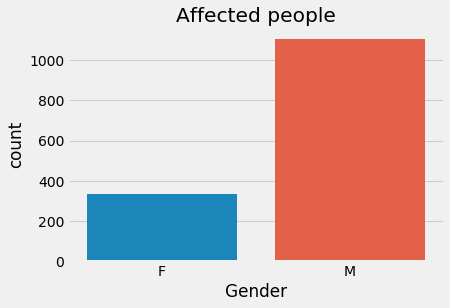

In [779]:
sns.countplot(covid_df['Gender'])
plt.title("Affected people")



Text(0.5, 1.0, 'Distribution of Age (Infected in India)')

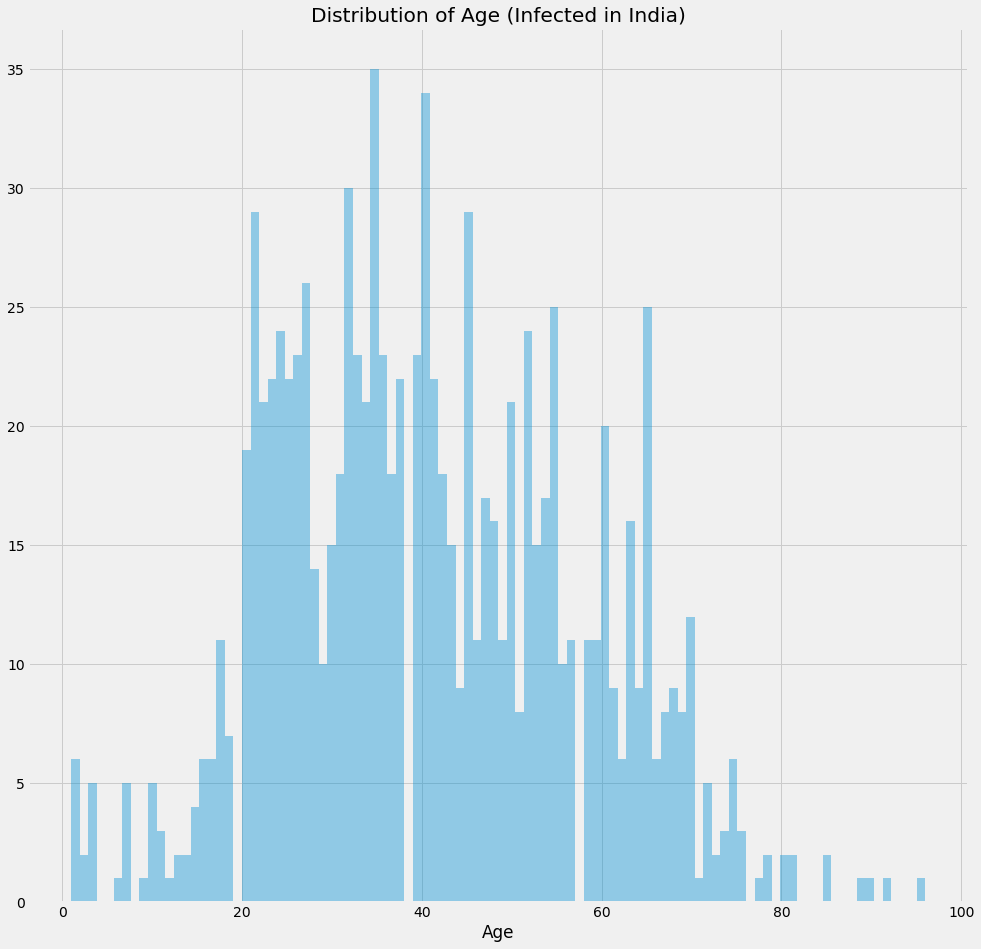

In [780]:
plt.figure(figsize=(15,15))
sns.distplot(df['Age'],kde=False,bins=100)
plt.title("Distribution of Age (Infected in India)")

In [781]:
y_no=df.groupby('Date Announced').count()['Patient Number']
date_df=pd.DataFrame(y_no)
date_df=date_df.reset_index()

In [782]:
date_df['Date Announced']=date_df['Date Announced'].astype('datetime64[ns]')

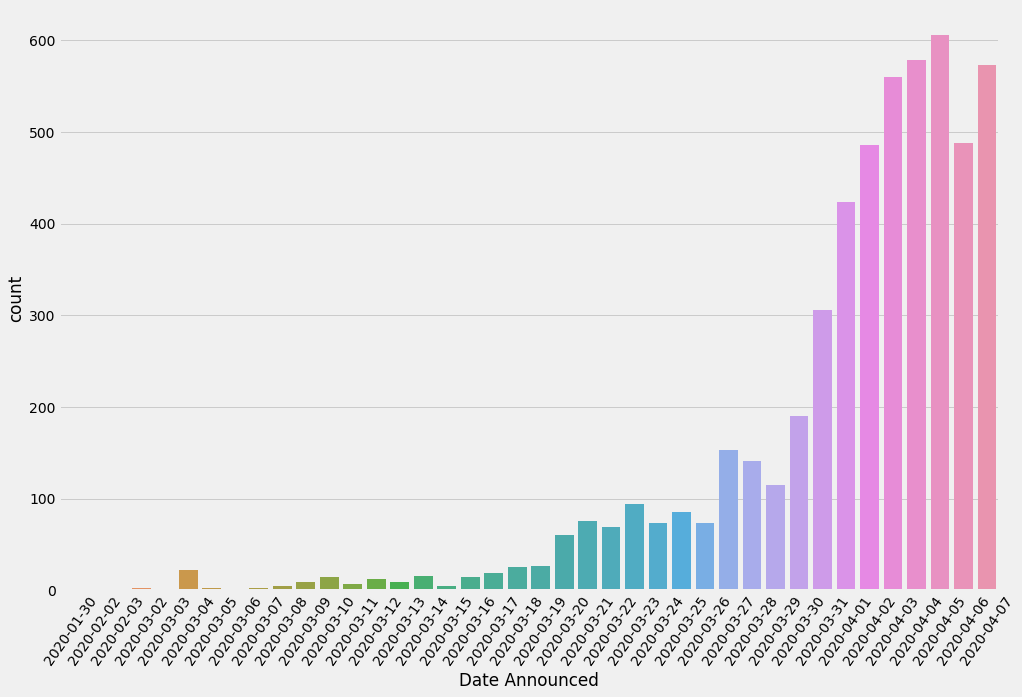

In [783]:
plt.figure(figsize=(15,10))
a=sns.countplot(covid_df['Date Announced'])

rotx = a.set_xticklabels(a.get_xticklabels(), rotation=55)


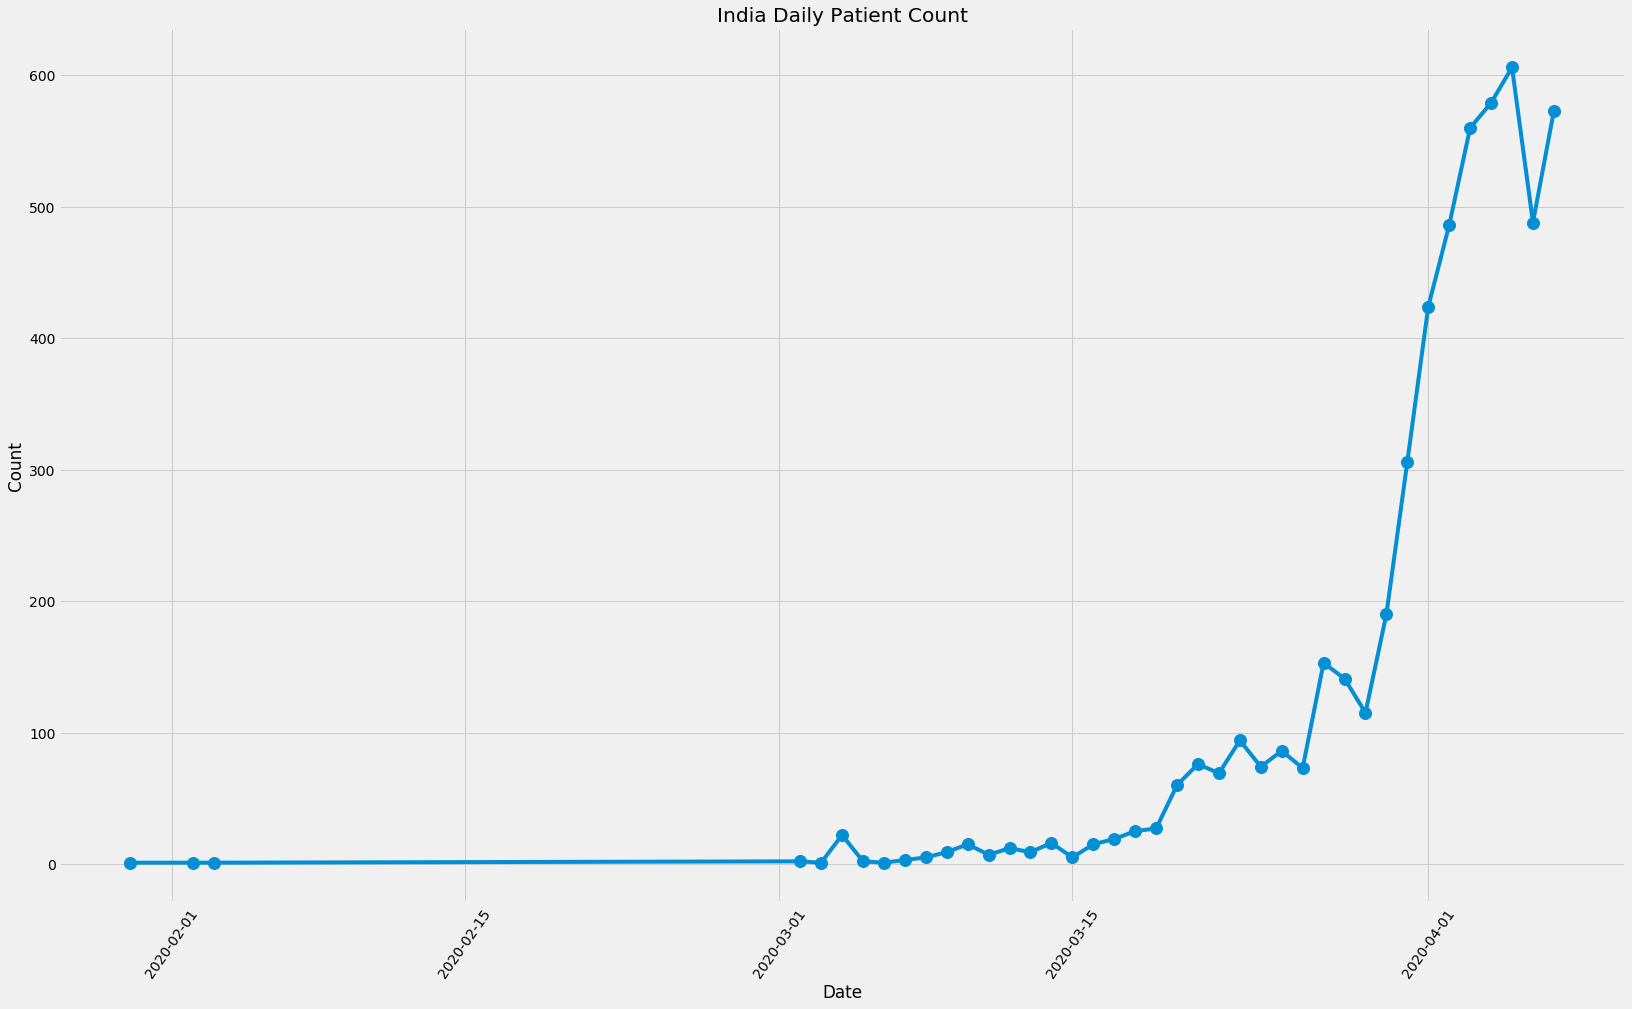

In [784]:
plt.figure(figsize=(25,15))
#fig, ax = plt.subplots()
#date_time=df.iloc(0)
#a=plt.plot_date(date_df['Date Announced'],date_df['Patient Number'],fmt="r-")
a=plt.plot(date_df['Date Announced'],date_df['Patient Number'],marker='o',markersize=12)
plt.xticks(rotation=55)
plt.title("India Daily Patient Count")
plt.ylabel("Count")
plt.xlabel("Date")
#ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m-%d'))
plt.show()


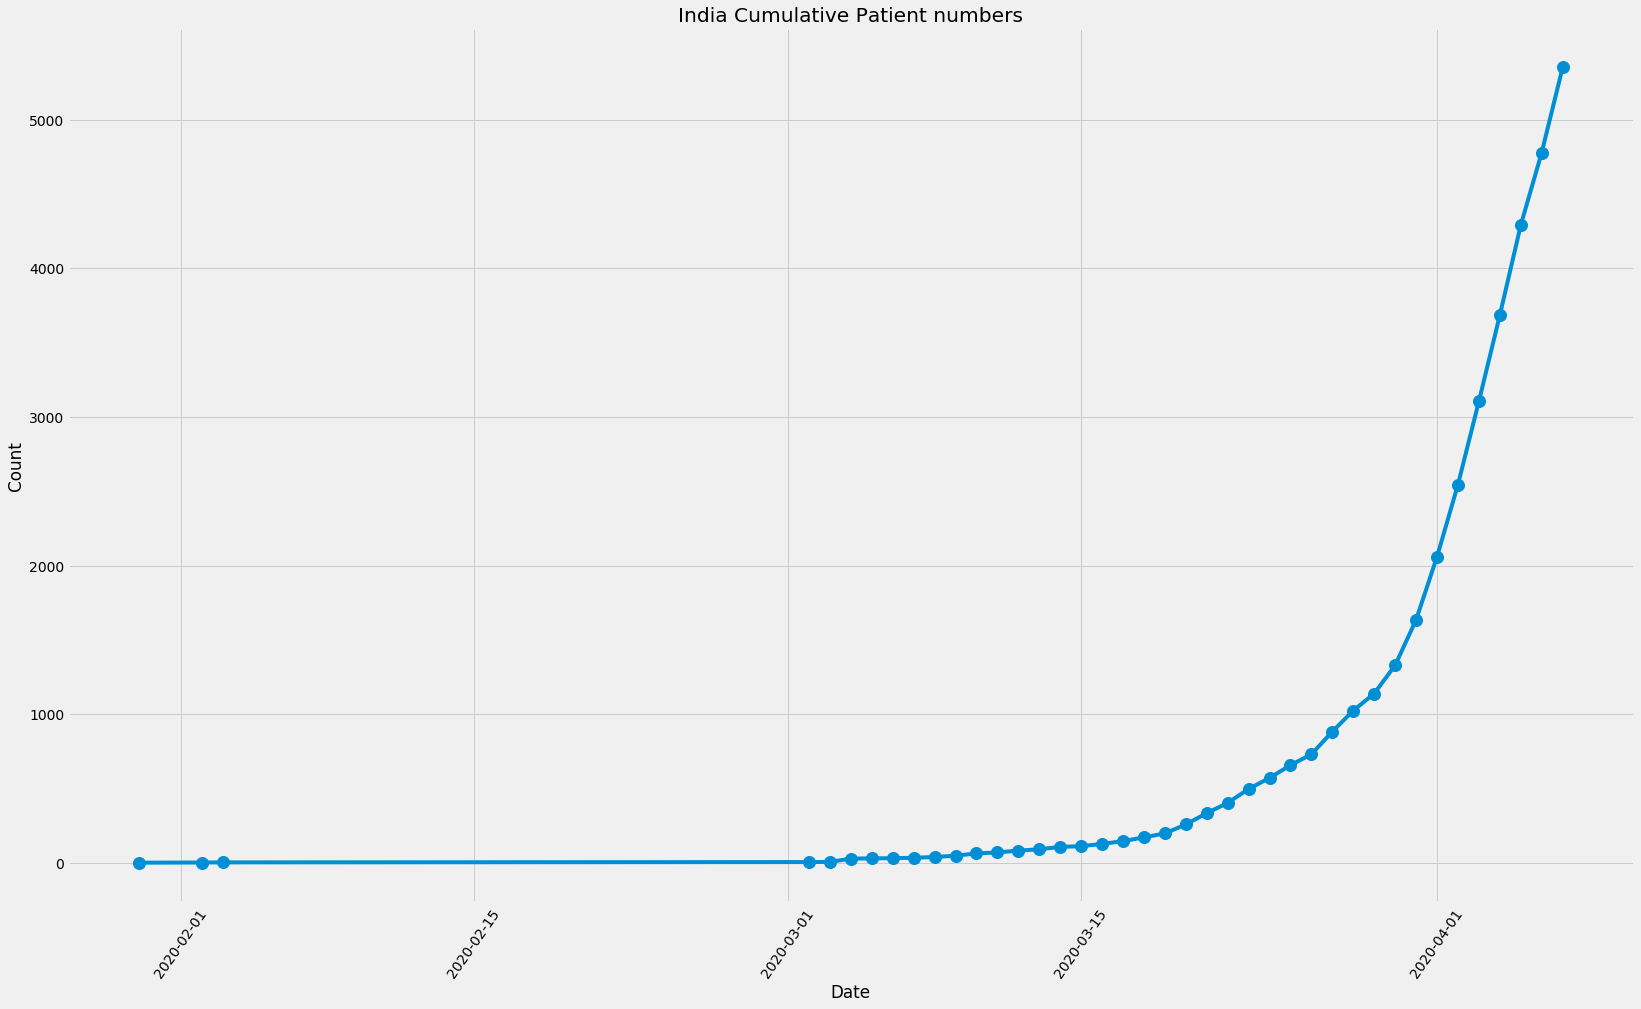

In [785]:
plt.figure(figsize=(25,15))
#fig, ax = plt.subplots()
#date_time=df.iloc(0)
#date_close=df.iloc(6)
a=plt.plot(date_df['Date Announced'],np.cumsum(date_df['Patient Number']),marker='o',markersize=12)
plt.xticks(rotation=55)
plt.ylabel("Count")
plt.xlabel("Date")
plt.title("India Cumulative Patient numbers")
#ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m-%d'))
plt.show()

In [787]:
daily=np.cumsum(date_df['Patient Number'])

In [789]:
log_daily=np.log(daily)

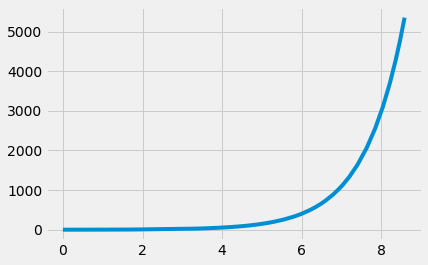

In [791]:
plt.plot(log_daily,daily)

In [725]:
patient_status_df=pd.read_csv("patientstatus.csv")
df_death_hist=patient_status_df.copy()


In [726]:

death_df=patient_status_df.groupby(['State','Patient Status']).count().unstack(['Patient Status']).fillna(0)['Sl_No']['Deceased']
death_df1=df.groupby(['Detected State','Current Status']).count().unstack(['Current Status']).fillna(0)['Patient Number']['Deceased']
df_to_plot = death_df.loc[lambda death_df: death_df != 0]


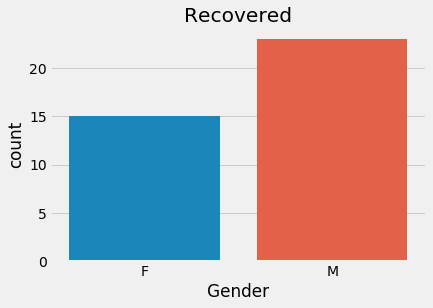

In [752]:
df_hist=df_death_hist[(df_death_hist['Patient Status']=='Recovered')]
plt.title("Recovered")
sns.countplot(df_hist['Gender'])

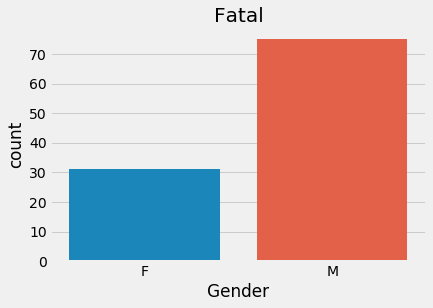

In [753]:
df_hist=df_death_hist[(df_death_hist['Patient Status']=='Deceased') | (df_death_hist['Patient Status']=='Deceased#')]
plt.title("Fatal")
sns.countplot(df_hist['Gender'],order=['F','M'])

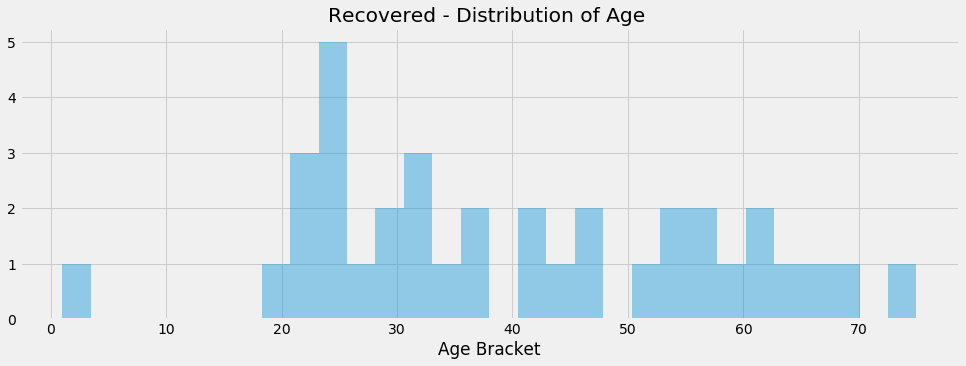

In [729]:
df_hist=df_death_hist[(df_death_hist['Patient Status']=='Recovered')]
plt.figure(figsize=(15,5))

a=sns.distplot(df_hist['Age Bracket'],kde=False,bins=30)
plt.title("Recovered - Distribution of Age ")
plt.show()


In [730]:
df_hist=df_death_hist[(df_death_hist['Patient Status']=='Deceased') | (df_death_hist['Patient Status']=='Deceased#')]
#df_hist['Age Bracket'].value_counts()

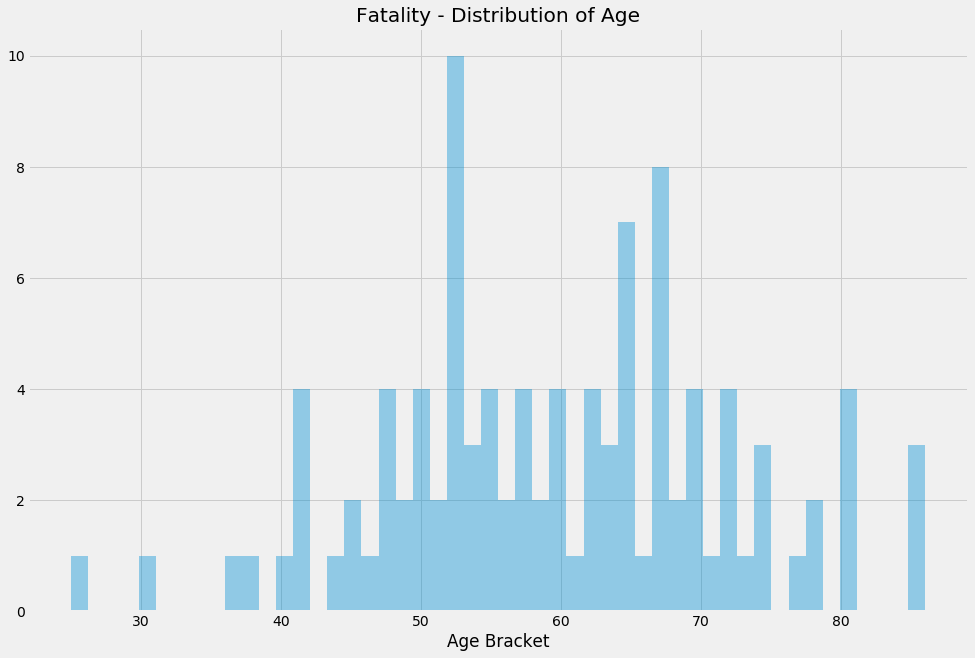

In [731]:
plt.figure(figsize=(15,10))

a=sns.distplot(df_hist['Age Bracket'],kde=False,bins=50)
plt.title("Fatality - Distribution of Age")
plt.show()


In [732]:
patient_status_df['Age Bracket']=patient_status_df['Age Bracket'].dropna()
patient_status_df['Age Bracket']=patient_status_df['Age Bracket'].astype("object")

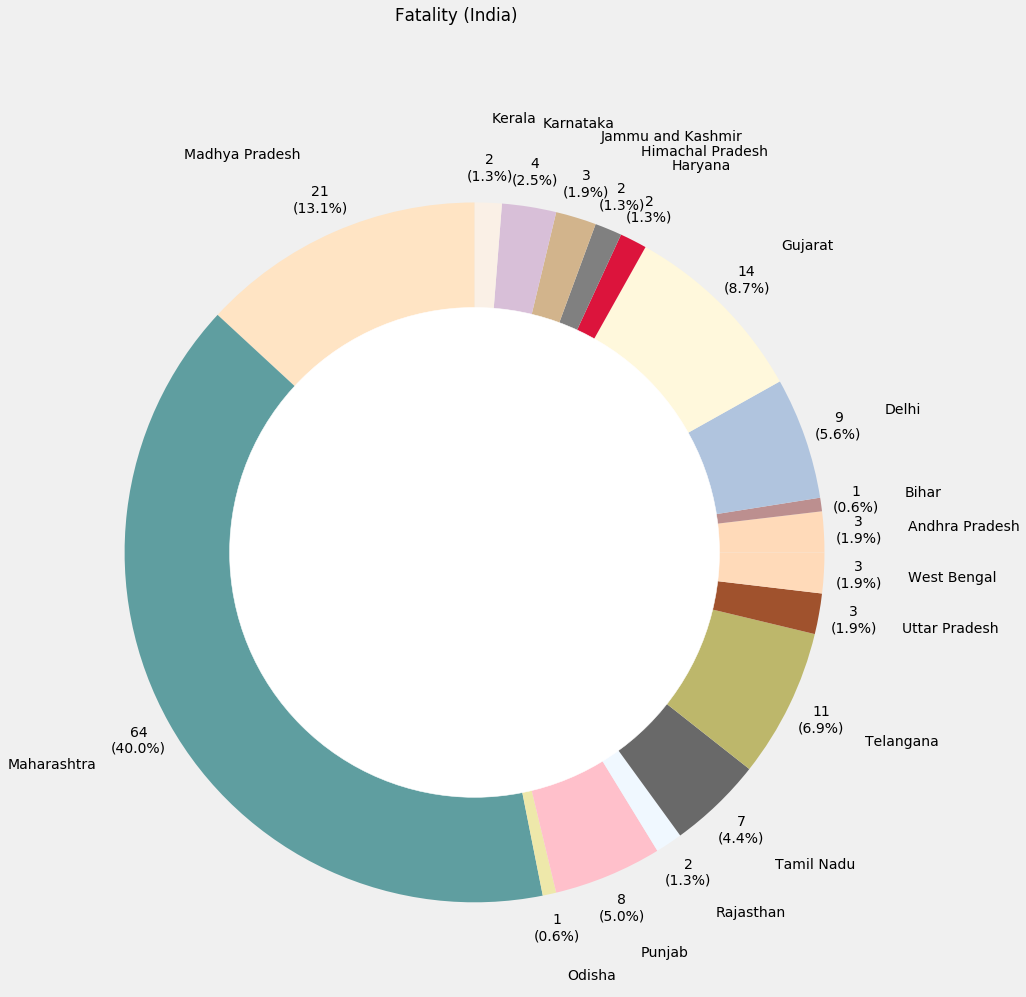

In [733]:
my_circle=plt.Circle( (0,0), 0.7, color='white')
colors = ['peachpuff', 'rosybrown', 'lightsteelblue','cornsilk','crimson','Grey','tan','thistle','linen','bisque','cadetblue','palegoldenrod','pink','aliceblue','dimgray','darkkhaki','sienna']

labels=death_df.index
plt.figure(figsize=(17,15))
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}\n({p:.1f}%)'.format(v=val,p=pct)
    return my_autopct

plt.pie(df_to_plot,rotatelabels=False, colors = colors,pctdistance=1.1,labeldistance=1.24,autopct=make_autopct(df_to_plot),labels=df_to_plot.index)
#autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else ''

p=plt.gcf()
p.gca().add_artist(my_circle)
plt.suptitle("Fatality (India)")
#plt.legend(df_to_plot.index,loc='upper left')
#plt.tight_layout()
plt.show()

#plt.pie(df_to_plot,rotatelabels=True, colors = colors,pctdistance=1.1, labeldistance=1.2, autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else ''labels=df_to_plot.index, )


In [734]:
df_temp1=patient_status_df.groupby(['State','Patient Status']).count().unstack(['Patient Status']).fillna(0)['Sl_No']

In [735]:
cases_df=df.groupby('Detected State').count()['Patient Number'].fillna(0)
case_df=cases_df.reset_index()

In [736]:
migcases_df=df.groupby(['Detected State','Current Status']).count().unstack(['Current Status']).fillna(0)['Patient Number']["Migrated"]

In [737]:
points = pd.concat([df_temp1, cases_df, migcases_df], axis=1)
points=points.fillna(0)
points['Hospitalised']=points['Patient Number']-points['Deceased']-points['Deceased#']-points['Migrated']
points.head()
overall=points.drop(['Patient Number','Deceased#'],axis=1)

In [738]:
overall=overall.reset_index()
overall=overall.replace({'Arunachal Pradesh': 'Arunachal','Andhra Pradesh': 'Andhra','Andaman and Nicobar Islands': 'A&N','Jammu and Kashmir': 'J&K','Dadra and Nagar Haveli':'DN','Himachal Pradesh':'HP','Madhya Pradesh':'MP'})
overall=overall.set_index('index')

Text(0.5, 1.0, 'Patientstatus_count')

<Figure size 1080x720 with 0 Axes>

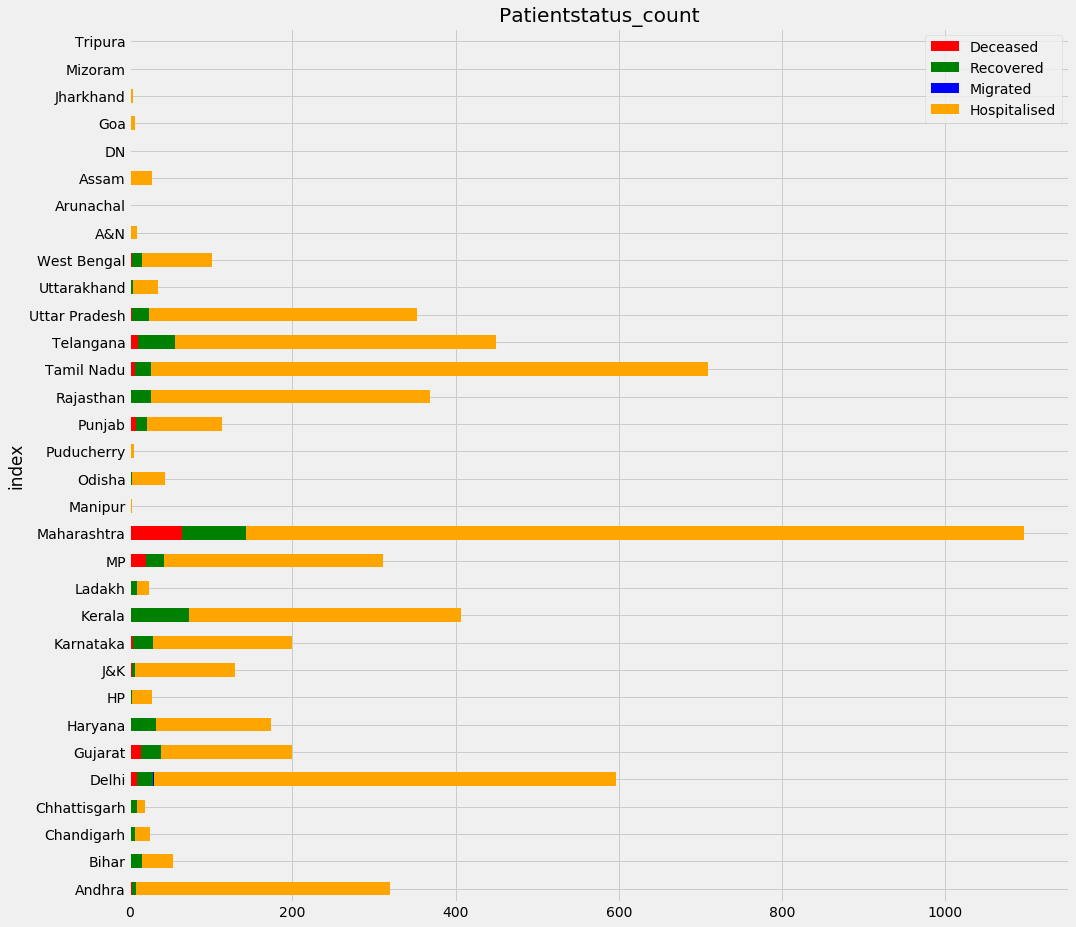

In [739]:
plt.figure(figsize=(15,10))
plt.tight_layout()
overall.plot.barh(stacked=True,rot=0,figsize=(15,15),color=['r','g','b','orange'])
plt.title("Patientstatus_count")

In [740]:
fp = '/Users/lek/Downloads/choropleth_pro_covid/visualisation/IND_adm/Admin2.shp'
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe

df_state=df.groupby(['Detected State']).count()['Patient Number']
df_state = df_state.reset_index()

merged = map_df.set_index('ST_NM').join(df_state.set_index('Detected State'))

/Users/lek/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


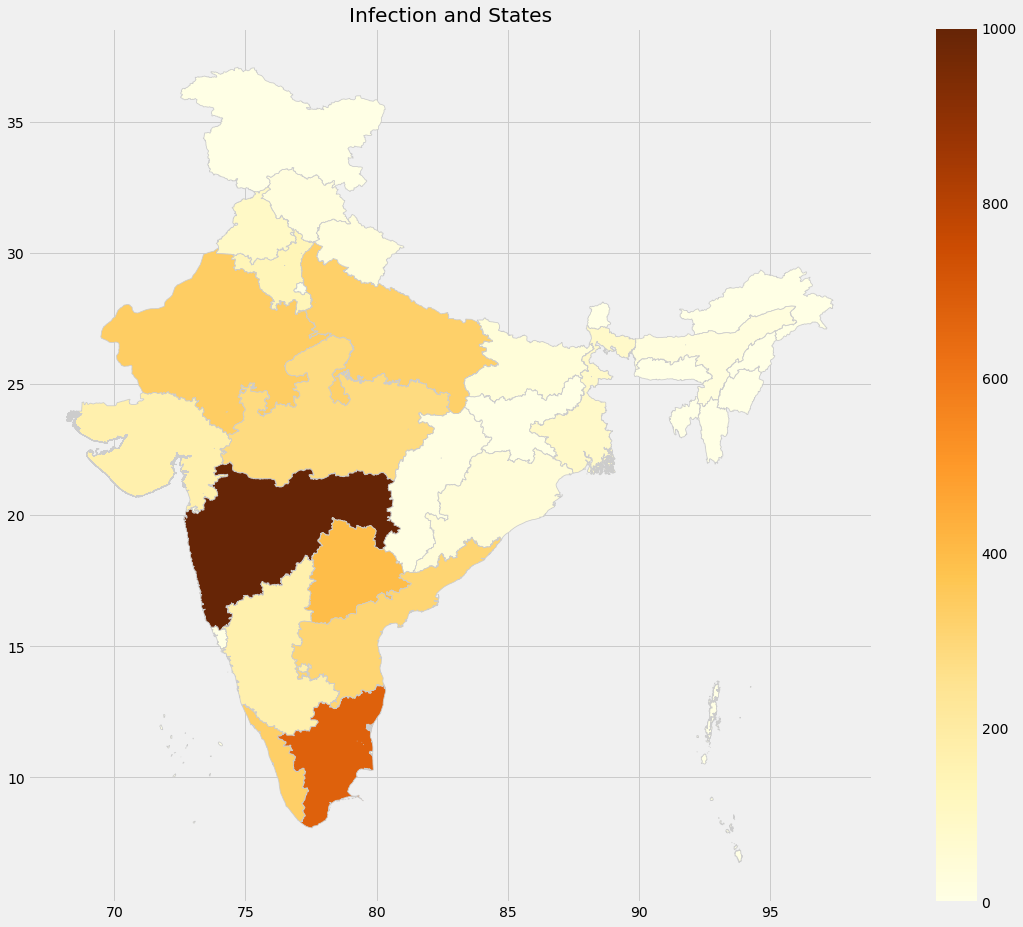

In [741]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Patient Number'
# set the range for the choropleth
vmin, vmax = 0, 1000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 15))
# create map
merged.plot(column=variable, cmap='YlOrBr', linewidth=0.8, ax=ax, edgecolor='0.8')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='YlOrBr', norm=plt.Normalize(vmin=vmin, vmax=vmax))
plt.title("Infection and States")
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

In [742]:
fp = '/Users/lek/Downloads/choropleth_pro_covid/visualisation/IND_adm/2011_Dist.shp'
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe

In [743]:

df_state=df.groupby(['Detected District']).count()['Patient Number']
df_state = df_state.reset_index()
#y=pd.DataFrame(df.groupby(['Detected District']).count()['Patient Number']==0)


In [744]:
map_df['DISTRICT']=map_df['DISTRICT'].replace('Leh (ladakh)','Leh')

In [745]:
merged = map_df.set_index('DISTRICT').join(df_state.set_index('Detected District'))
merged['District Status']=merged['Patient Number'].replace(np.nan,'NaN')
merged['District Status']=merged['District Status'].apply(lambda x : 0 if (x=='NaN') else 2000 )
#merged['Patient Number'] = merged['Patient Number'].fillna(2000)

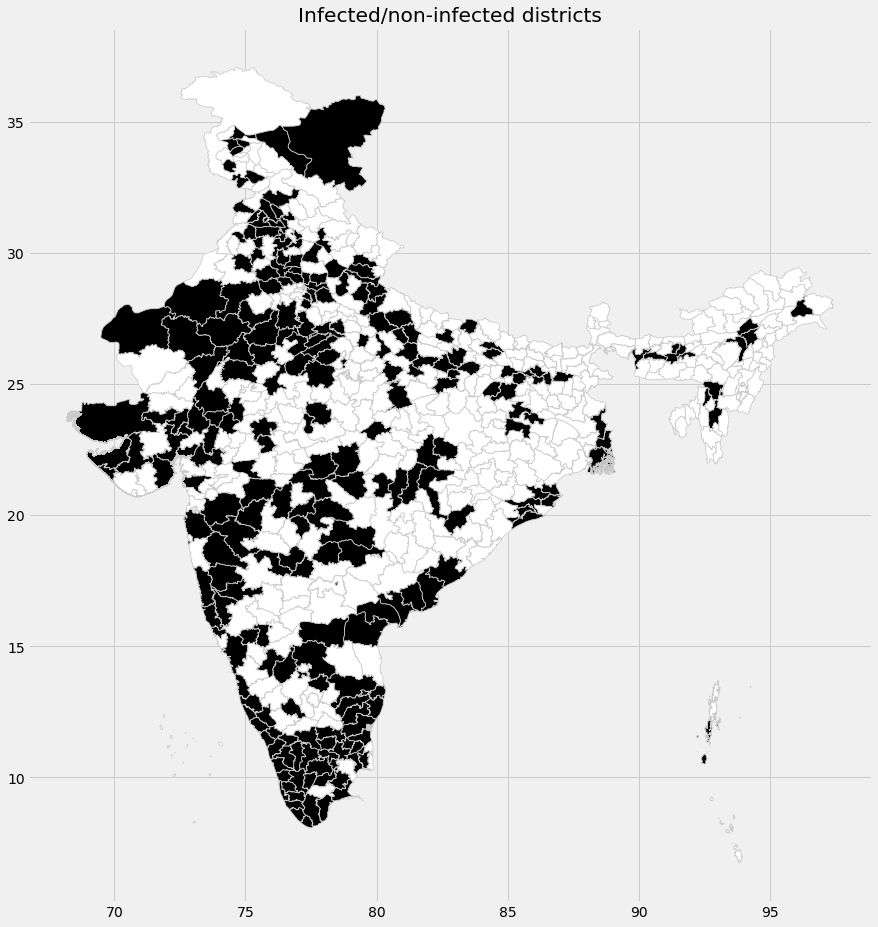

In [746]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'District Status'
# set the range for the choropleth
vmin, vmax = 0, 2000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 15))
# create map
merged.plot(column=variable, cmap='Greys', linewidth=0.8, ax=ax, edgecolor='0.8')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=vmin, vmax=vmax))
plt.title("Infected/non-infected districts")
# empty array for the data range
sm._A = []
# add the colorbar to the figure
#cbar = fig.colorbar(sm)

In [747]:
#df['Date Announced']

In [748]:
deno=list(df.groupby('Date Announced').count()['Patient Number'][7:])


In [749]:
num=deno[1:]
deno.pop(-1)
num=np.array(num)
deno=np.array(deno)



In [750]:
y1=df.groupby('Date Announced').count()['Patient Number'].index[8:]

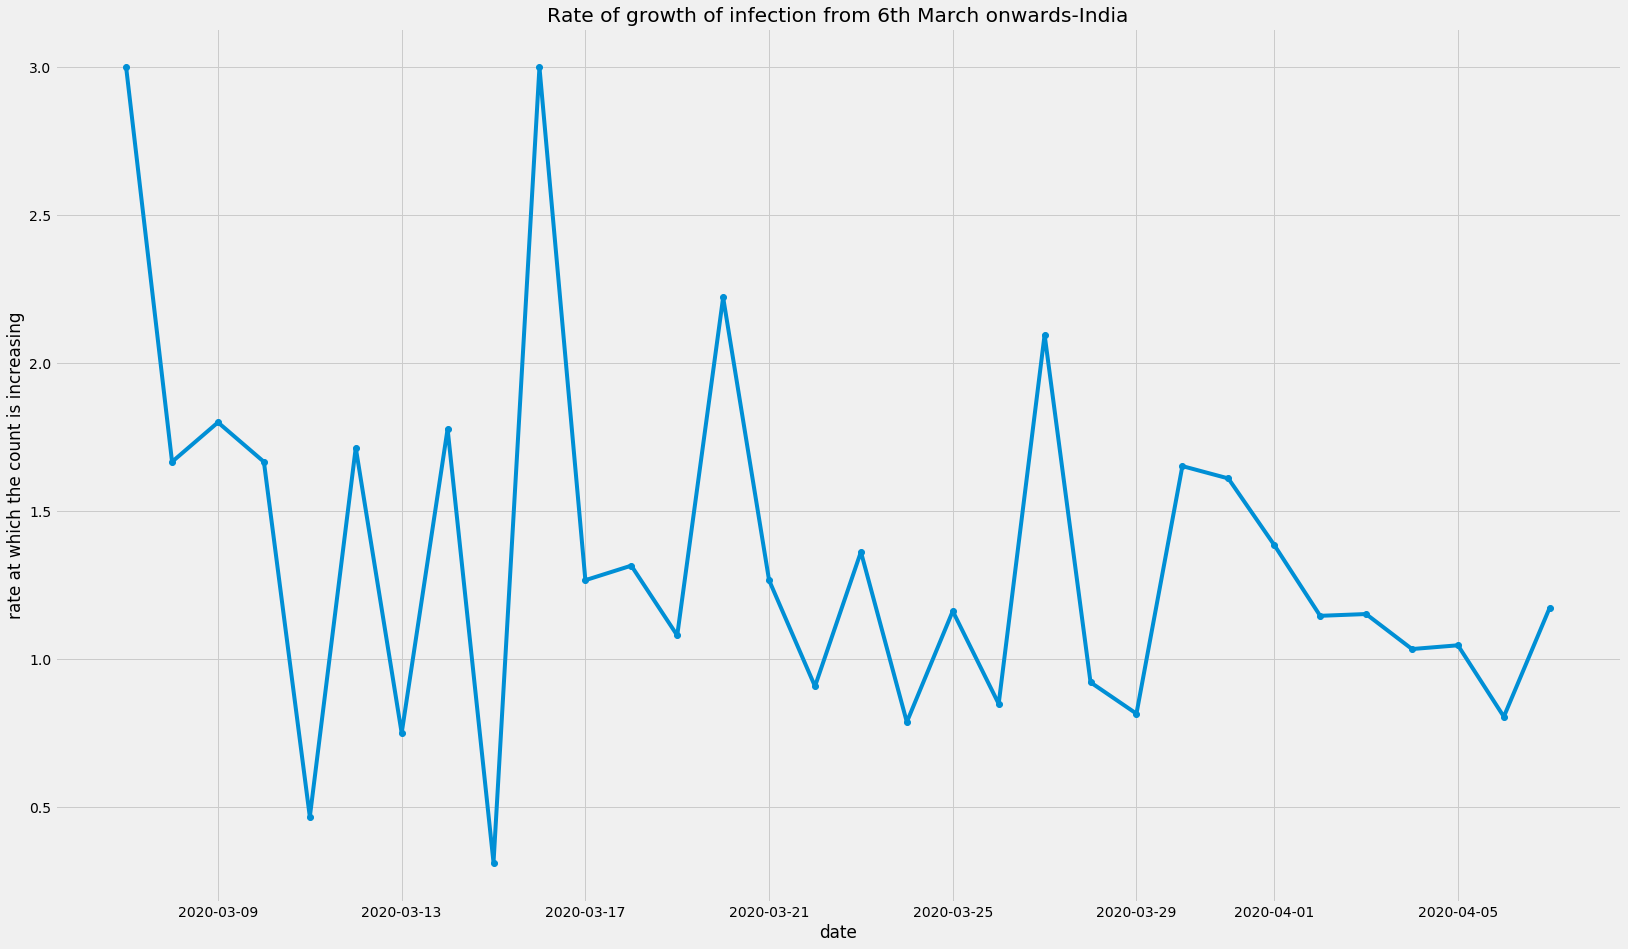

In [751]:
plt.figure(figsize=(25,15))
plt.ylabel("rate at which the count is increasing")
plt.xlabel("date")

plt.title("Rate of growth of infection from 6th March onwards-India")

plt.plot(y1,(num/deno),marker='o')
plt.show()